#Computer vision

It is used to detect and classify objects (eg : Road signs , traffic lights) , create a 3D maps or motion estimation and play a key role in making autonomous vehicles a reality

#ComputerVision Libraries ->

* torchvision : Base Domain libraray for Pytorch computer vision

* torchvision.datasets : Get Datasets and Data Loading functions for computer vision

* torchvision.models : Get pretrained computer vison models that you can leverage for your own problems

* torchvison.transforms : Functions for manipulating your vision data (images) to be suitable for use with an ML model


In [1]:
#Import Pytorch
import torch
import torch.nn as nn

#import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

#import matplotlib
import matplotlib.pyplot as plt

#Checking versions
print(torch.__version__)
print(torchvision.__version__)

2.1.0+cu121
0.16.0+cu121


# 1. Getting a dataset

The dataset we'll be using is FashionMNIST from torchvision.datasets

In [2]:
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.FashionMNIST(
    root = "data", #Where to download data to ?
    train = True, #Do we want the training dataset ?
    download = True, #Do we want to download
    transform = ToTensor(), #How do we want to transform the data
    target_transform = None #How do we want to transform the targets ?
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None,
)

100%|██████████| 26421880/26421880 [00:01<00:00, 15422654.59it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 262169.54it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4880424.93it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5175521.81it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data) , len(test_data)

(60000, 10000)

In [16]:
image , label = train_data[0]

In [17]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [21]:
label

9

In [22]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [23]:
#Corresponding index of Particular cloth
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [24]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [33]:
#Checking the shape of the image
print(f'Image shape is {image.shape} -> [color_channels , height , width]')
print(f'Image label : {class_names[label]}')

Image shape is torch.Size([1, 28, 28]) -> [color_channels , height , width]
Image label : Ankle boot


#Visulaizing our Data

Text(0.5, 1.0, '9')

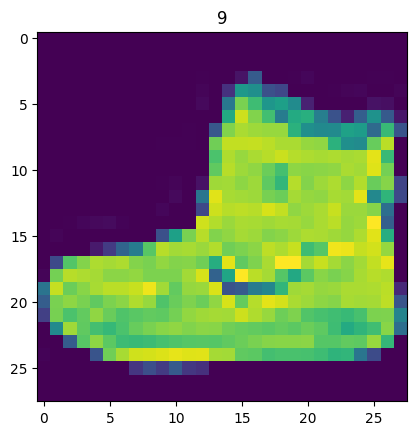

In [38]:
import matplotlib.pyplot as plt
image , label = train_data[0]
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

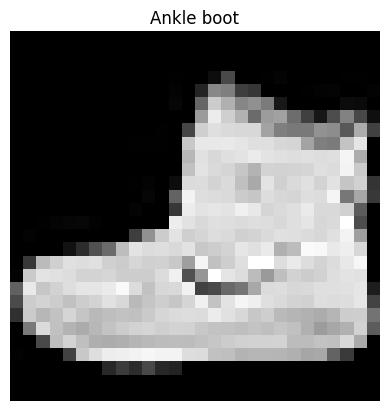

In [47]:
plt.imshow(image.squeeze(),cmap = "gray")
plt.title(class_names[label])
plt.axis(False)

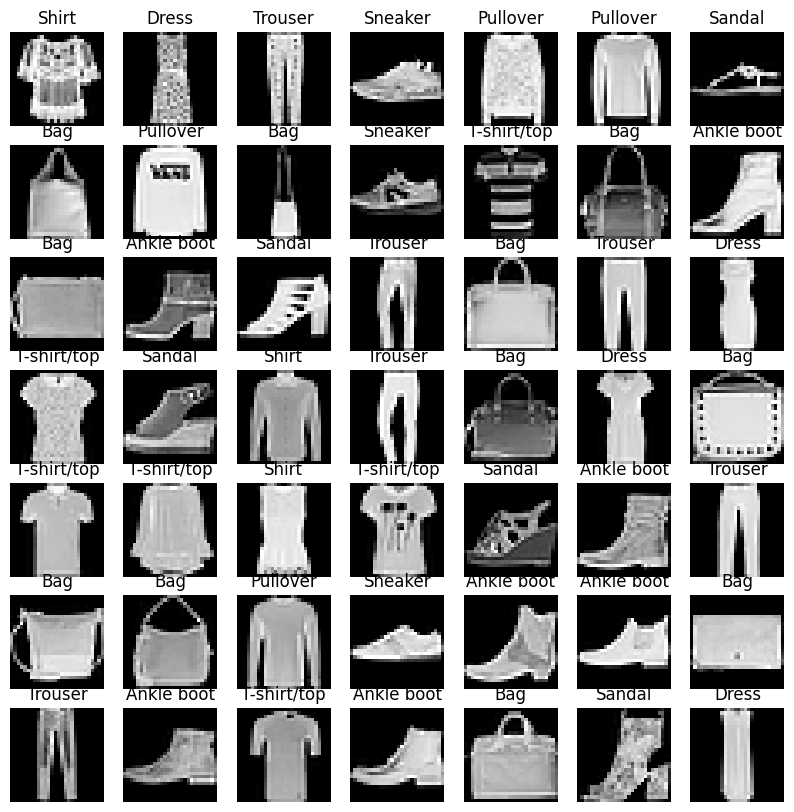

In [61]:
fig = plt.figure(figsize=(10,10))
rows = 7
columns = 7
for i in range(1,rows*columns+1):
  random_idx = torch.randint(1,len(train_data),(1,)).item()
  img , lab = train_data[random_idx]
  fig.add_subplot(rows,columns,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[lab])
  plt.axis(False)
